# FAKE NEWS DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real=pd.read_csv("true.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
empty_fake_data = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_data]                                            

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [7]:
real['text'] = real['title'] + real['text']

In [8]:
fake['text'] = fake['title'] + fake['text']

In [9]:
real['text'] = real['text'].apply(lambda x: str(x).lower())

In [10]:
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [11]:
real['label']=1
fake['label']=0

In [12]:
real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,'fully committed' nato backs new u.s. approach...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,lexisnexis withdrew two products from chinese ...,worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,vatican upbeat on possibility of pope francis ...,worldnews,"August 22, 2017",1


In [13]:
fake


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends out embarrassing new year’...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian ...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes an internet joke...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump is so obsessed he even has obama’s name...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis just called out donald trump dur...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,mcpain: john mccain furious that iran treated ...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice? yahoo settles e-mail privacy class-ac...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan: us and allied ‘safe zone’ plan to t...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,how to blow $700 million: al jazeera america f...,Middle-east,"January 14, 2016",0


In [14]:
real = real[['text','label']]
fake = fake[['text','label']]

In [15]:
data = real.append(fake,ignore_index=True)
data.sample(5)

,text,label
44485,another american known wolf? fort lauderdale s...,0
26363,melania trump busted committing perjury – lie...,0
10330,obama to nominate garland to supreme court: so...,1
22522,trump fan debates 12-year-old and humiliates ...,0
27589,bill o’reilly just made the most offensive an...,0


In [16]:
import preprocess_kgptalkie as ps
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x)) 

In [17]:
import gensim

D:\anaconda\New folder\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [18]:
y = data['label'].values

In [19]:
(data['label'].values)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
type(y)

numpy.ndarray

In [21]:
X = [words.split() for words in data['text'].tolist()]

In [22]:
type(X)

list

In [23]:
X[0]

['as',
 'us',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'their',
 'fiscal',
 'scriptwashington',
 'reuters',
 'the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'us',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'a',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 '2018',
 'in',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'tryi

In [24]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [25]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7582186460494995),
 ('malaysia', 0.6598287224769592),
 ('china', 0.6287757158279419),
 ('australia', 0.6149968504905701),
 ('thailand', 0.6100751757621765),
 ('indias', 0.6025740504264832),
 ('islamabad', 0.5968637466430664),
 ('philippines', 0.5962900519371033),
 ('beijings', 0.5933179259300232),
 ('modi', 0.5874215960502625)]

In [26]:
w2v_model.wv.most_similar('donald')

[('videodonald', 0.6377207636833191),
 ('fortyfirstdonald', 0.6234622597694397),
 ('grossmy', 0.5436844825744629),
 ('vla', 0.5408613681793213),
 ('queensbound', 0.5388376712799072),
 ('cruzdonald', 0.5371736884117126),
 ('clintongrant', 0.5275712013244629),
 ('wildskeystonegetty', 0.5263177156448364),
 ('russiaattorney', 0.5209223628044128),
 ('henningsentune', 0.5116614699363708)]

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [28]:
X = tokenizer.texts_to_sequences(X)

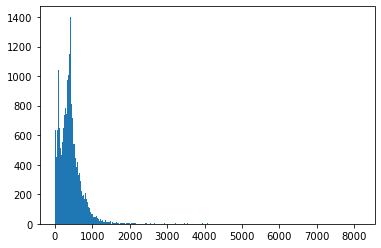

In [29]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [30]:
no = np.array([len(x) for x in X])

In [31]:

len(no[no>1000])

1588

In [32]:
import tensorflow as tf
maxlen=1000
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=maxlen)

In [33]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [34]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word] 
    return weight_matrix

In [35]:
embedding_vectors = get_weight_matrix(w2v_model)

In [36]:
embedding_vectors.shape

(252738, 100)

In [37]:
model=Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         25273800  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 25,391,177
Trainable params: 117,377
Non-trainable params: 25,273,800
_________________________________________________________________
None


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 970s 1s/step - loss: 0.2030 - accuracy: 0.9190 - val_loss: 0.0611 - val_accuracy: 0.9818
Epoch 2/6
737/737 [==============================] - 1035s 1s/step - loss: 0.0967 - accuracy: 0.9662 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 3/6
737/737 [==============================] - 906s 1s/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0286 - val_accuracy: 0.9926
Epoch 4/6
737/737 [==============================] - 734s 997ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0237 - val_accuracy: 0.9932
Epoch 5/6
737/737 [==============================] - 905s 1s/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0249 - val_accuracy: 0.9926
Epoch 6/6
737/737 [==============================] - 952s 1s/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0230 - val_accuracy: 0.9922


In [72]:
y_pred=(model.predict_classes(X_test) >= 0.5).astype(int)

In [41]:
accuracy_score(y_test,y_pred)

0.992694877505568

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5975
           1       0.99      0.99      0.99      5250

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [43]:
x=['this news is fake']
print(x)
x=tokenizer.texts_to_sequences(x)
print(x)
x=pad_sequences(x,maxlen=maxlen)
(model.predict_classes(x)).astype(int)

['this news is fake']
[[27, 94, 11, 600]]


array([[0]])

In [44]:

x=['narendra   modi   PRIME MINISTER  of   india']
print(x)
x=tokenizer.texts_to_sequences(x)
print(x)
x=pad_sequences(x,maxlen=maxlen)
      

['narendra   modi   PRIME MINISTER  of   india']
[[10059, 4976, 429, 203, 3, 1805]]


In [45]:
(model.predict_classes(x)).astype(int)

array([[1]])

In [47]:
from tkinter import*
import tkinter as tk
root = tk.Tk()
#creating canvas
canvas = tk.Canvas(root,height=720,width=1280,bg="#006871").pack()
root.title("WELCOME TO FAKE NEWS DETECTOR!")
#creating a frame
frame = tk.Frame(root,bg="black")
frame.place(relwidth=0.8,relheight=0.8,relx=0.1,rely=0.1)

def onsubmit():
    #Enter Scanning code here...
    text1 = entry.get("1.0", "end-1c")
   
    #Label(frame,text=text1).place(x=100,y=300)
   
    text=[''.join(text1)]
    print(text)
    x=tokenizer.texts_to_sequences(text)
    print(x)
    x=pad_sequences(x,maxlen=maxlen)
    print(x)
    
    pred=(model.predict_classes(x) >= 0.5).astype(int)
    print(pred)
    if(pred==[[0]]):
        lbl1 = tk.Label(frame, text = "FAKE NEWS", width =20,height=2,font=8).place(x= 420,y=400)
                
    else:
        lbl2 = tk.Label(frame, text = "REAL NEWS",width =20,height=2,font=8).place(x= 420,y=400)

                
        
#labels
Label(frame,text="Fake News Detector",font =16,fg="white",bg="black").pack()#place(x=80,y=50)
Label(frame,text="Enter news here:",fg="white",bg="black").place(x= 60,y=75)
       
        
#creating entry box

input_text=StringVar()
entry=Text(frame)
entry.place(x=60,y=100,height=200,width=900) 

#creating a button
Button(frame,text = "Predict",command=onsubmit, width =6,height=2,font=8).place(x=465,y=320)
root.mainloop()

['NARENDRA MODI IS PRESIDENT OF INDIA\n']
[[10059, 4976, 11, 38, 3, 1805]]
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0